In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
# y = torch.tensor([[1], [1], [1], [0]], dtype=torch.float32)

In [3]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = XORModel()
model

XORModel(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [4]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

/home/akiyama/.conda/envs/base310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 100/10000, Loss: 0.7049362659454346
Epoch 200/10000, Loss: 0.6943386793136597
Epoch 300/10000, Loss: 0.6910948753356934
Epoch 400/10000, Loss: 0.6895958185195923
Epoch 500/10000, Loss: 0.6880471706390381
Epoch 600/10000, Loss: 0.6861082911491394
Epoch 700/10000, Loss: 0.6837493181228638
Epoch 800/10000, Loss: 0.6809235215187073
Epoch 900/10000, Loss: 0.6774704456329346
Epoch 1000/10000, Loss: 0.6730979681015015
Epoch 1100/10000, Loss: 0.6674625873565674
Epoch 1200/10000, Loss: 0.6603562831878662
Epoch 1300/10000, Loss: 0.6518365144729614
Epoch 1400/10000, Loss: 0.6421715617179871
Epoch 1500/10000, Loss: 0.6317520141601562
Epoch 1600/10000, Loss: 0.6210438013076782
Epoch 1700/10000, Loss: 0.6104921698570251
Epoch 1800/10000, Loss: 0.6004239916801453
Epoch 1900/10000, Loss: 0.591026246547699
Epoch 2000/10000, Loss: 0.5823761820793152
Epoch 2100/10000, Loss: 0.5744805335998535
Epoch 2200/10000, Loss: 0.5673058032989502
Epoch 2300/10000, Loss: 0.5607988834381104
Epoch 2400/10000, Los

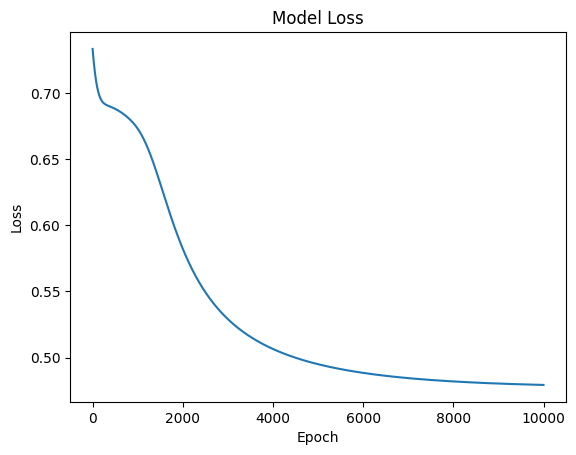

In [5]:
losses = []
epochs = 10000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

plt.plot(losses)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [6]:
with torch.no_grad():
    outputs = model(X)
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y).float().mean()
    print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.75


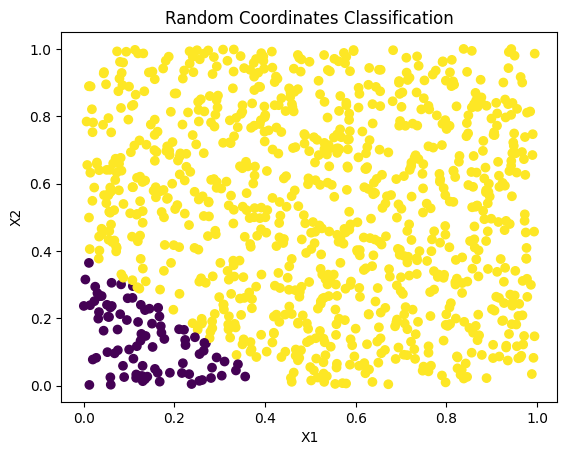

In [7]:
coords = torch.rand(1000, 2)
predictions = model(coords)

plt.scatter(coords[:, 0], coords[:, 1], c=predictions[:, 0] > 0.5, cmap='viridis')
plt.title('Random Coordinates Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
with torch.no_grad():
    outputs = model(X)
    predicted = (outputs > 0.5).float()
    accuracy = (predicted == y).float().mean()
    print(f'Accuracy on XOR Data: {accuracy.item()}')

Accuracy on XOR Data: 0.75
